# My First Agent: Write a LP problem (v0.1.0)
**Dr. Dave Wanik - Operations and Information Management -  University of Connecticut**

I'm working on an AI Mini-Grant with UConn CETL and am trying to make 'agents' to make more interesting problems or analyses. My students will make agents as part of my class. This is a simple agent that just writes word problems - later we will have it write code, write mathematical formulations, and create stunning visualizations. Maybe we will have one do MC simulations!

Link to Github: https://github.com/drdww/agent-toolkit/tree/main

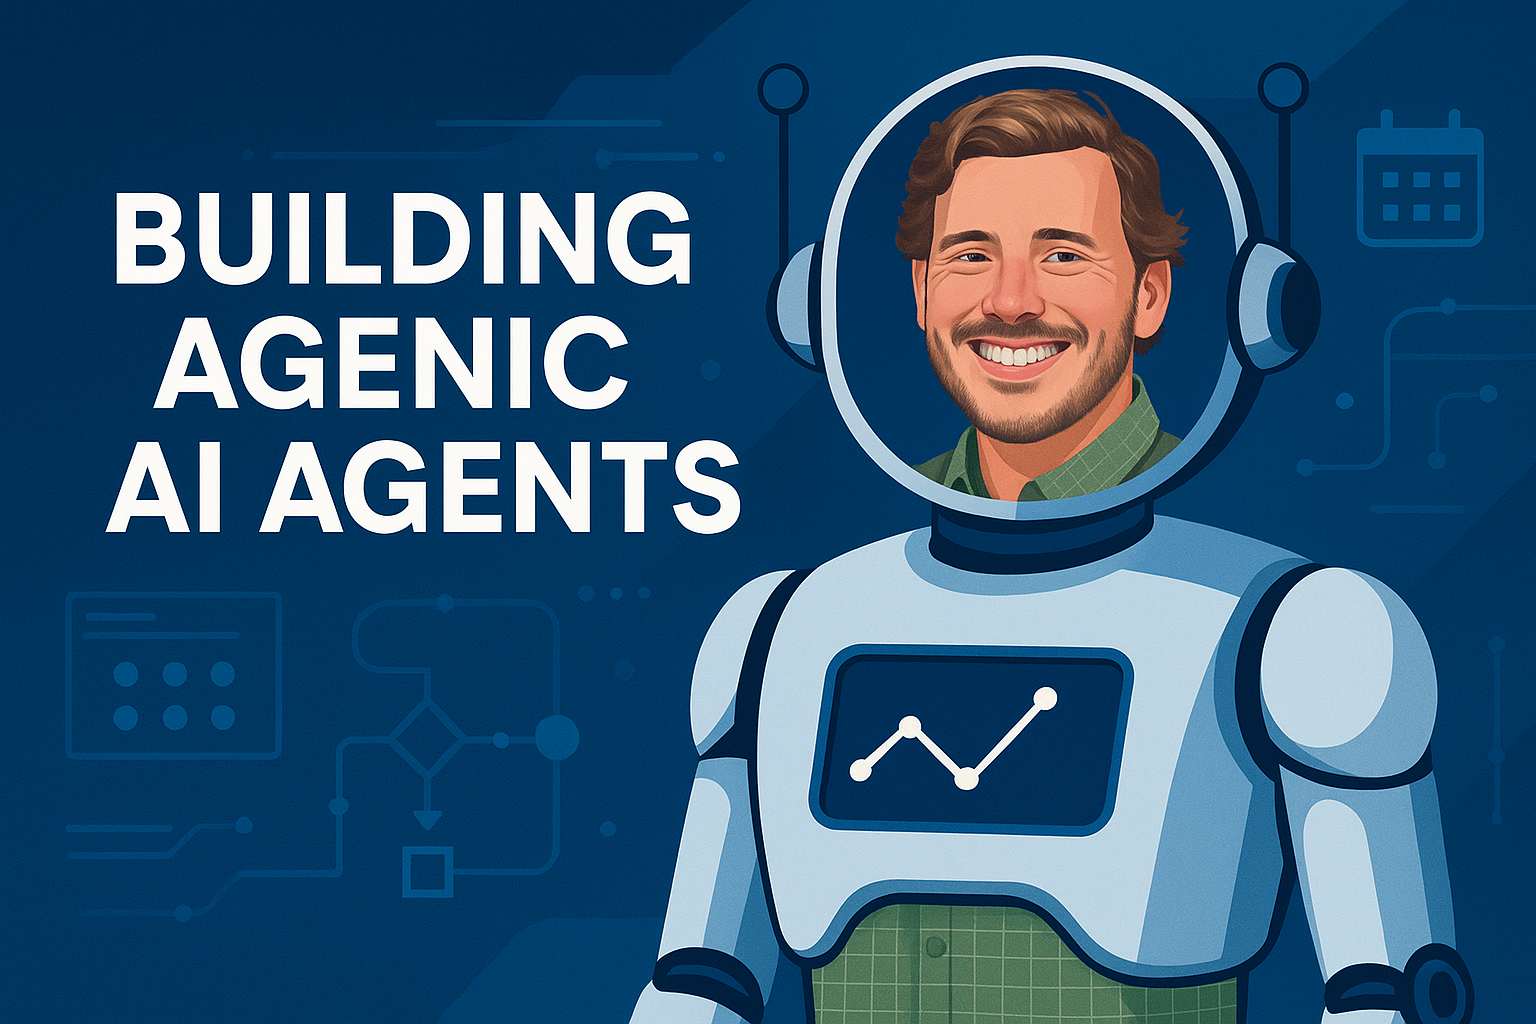

# Get an API Key
1. Go to: https://platform.openai.com/signup
(or https://platform.openai.com/account/api-keys if you're already logged in)

2. Sign up or log in with your OpenAI account.

3. Navigate to: Account → API Keys → Click “+ Create new secret key”

4. Give it a name like classroom-agent-key. Copy it and save it in a safe place — you will need copy/paste it later.

# Paste In Your Secret API Key

In [ ]:
import os
import getpass

# Ask for key securely (won’t show up on screen or in history)
os.environ["OPENAI_API_KEY"] = getpass.getpass("Paste your OpenAI API key:")


Paste your OpenAI API key:··········


Now that you have pasted your key, you are almost ready to rock!

# Update Your Billing
1. Go to your OpenAI billing settings

2. Under "Payment Methods", click Add a Payment Method (and fund with some small amount like 5 bucks.)

3. Then go to Usage Limits and set something safe, like: Hard limit: $5/month. You can also sign up for warnings based on usage.

Now that you are FUNDED... you are ready to rock!

# 🔐 Why this is safe
* Your key is never printed or saved in the notebook
* If you share the notebook, others won’t see your
  * And if they want to use it, they can paste in their own key!
* **Works** great with Colab’s runtime session model

In [ ]:
!pip install --quiet openai

from openai import OpenAI

# Pull key from env var (safe!)
client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])

response = client.chat.completions.create(
    model="gpt-4o",
    messages=[{"role": "user", "content": "Give me a fun LP scheduling problem for undergrads."}],
    temperature=0.3,
)

print(response.choices[0].message.content.strip())


Certainly! Here's a fun and engaging linear programming (LP) problem that can be used for an undergraduate class:

---

**The Gourmet Food Truck Challenge**

You are the owner of a popular gourmet food truck, "Tasty Travels," that serves two main dishes: Gourmet Tacos and Artisan Burritos. Your food truck is preparing for a big weekend festival, and you want to maximize your profits while considering the constraints of your resources.

**Objective:**
Maximize your profit from selling Gourmet Tacos and Artisan Burritos.

**Constraints:**
1. **Ingredients Available:**
   - You have 30 pounds of meat.
   - You have 20 pounds of vegetables.
   - You have 15 pounds of cheese.

2. **Ingredient Requirements:**
   - Each Gourmet Taco requires 0.5 pounds of meat, 0.2 pounds of vegetables, and 0.1 pounds of cheese.
   - Each Artisan Burrito requires 0.4 pounds of meat, 0.4 pounds of vegetables, and 0.2 pounds of cheese.

3. **Profit:**
   - Each Gourmet Taco sold gives you a profit of $3.
   - E

Tada! You did your first secure OpenAI call! Now we will try to modularize it and make it more professional, reusable and better. Code often goes to die or is stuck in proof-of-concept phase if it's not put into production and packaged well... and we will learn this together!

# Our first introduction to Git and GitHub
I teach more about Git and GitHub in my OPIM 5512 class, but we will start using bits and pieces here to make you more comfortable.

## 🔹 1. Install

* Go to https://git-scm.com/downloads

* Download the version for your OS (Windows/macOS/Linux)

* Run the installer — accept the default settings (they’re fine!)

* To confirm it worked, open a terminal (or PowerShell) and type:

`git --version`

And you should see something like 2.50.0.windows.1`

##🔹 2. Connect Git to GitHub (first time only)
Open your terminal (or inside VS Code → View → Terminal), and run:

* `git config --global user.name "Your Name"`
* `git config --global user.email "you@example.com"`


##🔹 3. Create a GitHub repo online
* Go to https://github.com/new
* Create a new repo called agent-toolkit
Name: agent-toolkit

* Public or Private: Your choice (go public why not!)

* Initialize with README: ✅ (optional but recommended)

##🔹 4. Clone the repo to your desktop
* Open VS Code → File → Open Folder
* Open the terminal in VS Code (bottom panel or `Ctrl+``)

`git clone https://github.com/YOUR_USERNAME/agent-toolkit.git`
`cd agent-toolkit`

And if you look on your Desktop, you should see where it downloaded!

##🔹 5. Create the project structure
Inside that `agent-toolkit/` folder in VS Code, create the folders and files from earlier:

In [ ]:
'''agent-toolkit/
  ├── .gitignore
  ├── .env.sample
  ├── pyproject.toml
  ├── README.md
  └── src/
      └── agent_toolkit/
          ├── __init__.py
          └── core.py
'''

Just use the 📁 icon in VSCode to add folders and the file icon to add files. In the markdown, you can add something like this:


`# agent-toolkit`

`A simple wrapper to run OpenAI GPT-4o chat agents in Python.  `
`This will grow into a reusable toolkit for educational projects and demos.`




## and now fill in the files!
Yes, literally open each of the files you just made in VSCode and paste this information in.

---

### 📄 `.gitignore`

**Purpose:** Prevents sensitive or unnecessary files from being committed to GitHub.

Includes:
- `.env` — where your real API key lives
- `__pycache__/` — Python-generated cache files
- `*.pyc` — compiled bytecode



In [ ]:
# put this code in
.env
__pycache__/
*.pyc

---

### 📄 `.env.sample`

**Purpose:** Template showing what environment variables are needed. A template showing what environment variables (like API keys) are needed.

We commit this (but **not** the real `.env`) so others know what to create.

Example:
```bash
OPENAI_API_KEY=sk-your-key-goes-here
```

In [ ]:
# put this code in
OPENAI_API_KEY=sk-your-api-key-goes-here



---

### 📄 `pyproject.toml`

**Purpose:** Metadata for your Python package. Declares your package’s metadata and dependencies. Required for pip install to work.

Defines:
- The name of your package (`agent-toolkit`)
- What it depends on (`openai`)
- How it should be installed (build system)


In [ ]:
# put this code in
[project]
name = "your-package-name"
version = "0.1.0"
description = "A short description of your project"
authors = [{ name = "Your Name", email = "you@example.com" }]
dependencies = ["openai>=1.0.0"]

[build-system]
requires = ["setuptools"]
build-backend = "setuptools.build_meta"



### 📄 `README.md`

**Purpose:** First impression on GitHub. Describes the project and how to use it.

Good to include:
- What it does
- How to install and use it
- Example prompts

I wrote a very simple README before with a header and some text...


In [ ]:
# Your Project Name
A short description of what your package does.


---

### 📁 `src/agent_toolkit/`

**Purpose:** Where your actual code lives. This is your reusable Python module.

The `src/` layout is a best practice that avoids import bugs and keeps things clean.

---

### 📄 `src/agent_toolkit/__init__.py`

**Purpose:** Tells Python this is a package.  
Also exposes your main function at the top level.


In [ ]:
from .core import run_chat_agent

---

### 📄 `src/agent_toolkit/core.py`

**Purpose:** Core logic that talks to the OpenAI API.

This:
- Loads your API key from environment variables
- Sends a chat prompt to GPT-4o
- Returns the result

Students can edit this file to try different prompts, models, or agent logic.

In [ ]:
import os
from openai import OpenAI

def run_chat_agent(prompt: str, model: str = "gpt-4o") -> str:
    api_key = os.getenv("OPENAI_API_KEY")
    if not api_key:
        raise RuntimeError("OPENAI_API_KEY not set.")

    client = OpenAI(api_key=api_key)
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}],
        temperature=0.3,
    )
    return response.choices[0].message.content.strip()


# What does all of this do?!

# Time to commit to Github
Now go to your Terminal in VSCode.

### 🧹 6. Stage and Commit Changes

Once your files are ready:

```bash
git add .
git commit -m "Initial commit: project setup"
```

---

### 🚀 7. Push to GitHub

```bash
git push origin main
```

Visit `https://github.com/YOUR_USERNAME/YOUR_REPO_NAME` to verify your code is online.

---

### 📦 8. Bonus: Install in Google Colab

You can now install your code in Colab like this:

```python
!pip install git+https://github.com/YOUR_USERNAME/YOUR_REPO_NAME.git
```

Then import and use it:

```python
from your_module import your_function
```

---

### 🔐 REMINDER: Never commit secrets like API keys!

Use `.env` files and environment variables instead.

# Then Run It

In [ ]:
!pip install git+https://github.com/drdww/agent-toolkit.git

  Cloning https://github.com/drdww/agent-toolkit.git to /tmp/pip-req-build-q0g6ezle
  Running command git clone --filter=blob:none --quiet https://github.com/drdww/agent-toolkit.git /tmp/pip-req-build-q0g6ezle
  Resolved https://github.com/drdww/agent-toolkit.git to commit cb3029501d1790197453afead3b6c45237153a1f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for agent-toolkit: filename=agent_toolkit-0.1.0-py3-none-any.whl size=1767 sha256=9aba965c36a61e29448e3b2ae541626909434a6b11097e126ee6009fb1682c1c
  Stored in directory: /tmp/pip-ephem-wheel-cache-pijt4ezl/wheels/e8/ec/c3/6cdf2deb515a53b6d9af2f1e82e97d040a2daac491641bedae
Successfully built agent-toolkit


In [ ]:
import os
import getpass

# Set your API key for this session
os.environ["OPENAI_API_KEY"] = getpass.getpass("Paste your OpenAI API key:")


Paste your OpenAI API key:··········


In [ ]:
from agent_toolkit import run_chat_agent

response = run_chat_agent("Suggest a clever linear programming case study for undergrads.")
print(response)


A compelling supply chain optimization case study for undergraduates could focus on "Optimizing the Last-Mile Delivery for an E-commerce Company." This case study would allow students to explore various aspects of supply chain management, including logistics, technology, and customer service. Here's a brief outline of the case study:

### Case Study: Optimizing Last-Mile Delivery for E-ShopCo

#### Background:
E-ShopCo is a rapidly growing e-commerce company that specializes in consumer electronics. With the surge in online shopping, the company faces challenges in delivering products to customers efficiently and cost-effectively, especially in urban areas where traffic congestion and delivery density vary significantly.

#### Objectives:
- Reduce last-mile delivery costs by 15% within one year.
- Improve delivery time accuracy to ensure 95% of deliveries are made within the promised time window.
- Enhance customer satisfaction by minimizing delivery-related complaints.

#### Challenge